# Feature Transformation:

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('customer.csv')

In [3]:
df.sample(5)

,age,gender,review,education,purchased
25,57,Female,Good,School,No
44,77,Female,Average,UG,No
36,34,Female,Good,UG,Yes
43,27,Male,Poor,PG,No
20,57,Female,Average,School,Yes


In [4]:
df = df.iloc[:,2:] # removing age

In [5]:
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2)

In [8]:
X_train # independent feature

,review,education
49,Good,UG
37,Average,PG
25,Good,School
17,Poor,UG
2,Good,PG
38,Good,School
11,Good,UG
41,Good,PG
15,Poor,UG
7,Poor,School


In [9]:
from sklearn.preprocessing import OrdinalEncoder              

In [10]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

- Poor < Average < Good 
- School < UG < PG

We have two orders in both the independent columns

In [11]:
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [12]:
X_train = oe.transform(X_train)

In [13]:
X_train

array([[2., 1.],
       [1., 2.],
       [2., 0.],
       [0., 1.],
       [2., 2.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 2.],
       [0., 0.],
       [1., 1.],
       [0., 2.],
       [2., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 2.],
       [1., 2.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [0., 2.],
       [0., 2.],
       [2., 0.],
       [2., 2.],
       [0., 0.],
       [0., 2.],
       [2., 0.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [2., 2.],
       [2., 2.]])

In [14]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [15]:
X_train

array([[2., 1.],
       [1., 2.],
       [2., 0.],
       [0., 1.],
       [2., 2.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 2.],
       [0., 0.],
       [1., 1.],
       [0., 2.],
       [2., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 2.],
       [1., 2.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [0., 2.],
       [0., 2.],
       [2., 0.],
       [2., 2.],
       [0., 0.],
       [0., 2.],
       [2., 0.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [2., 2.],
       [2., 2.]])

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
le.fit(y_train) # Label Encoding always on dependent column (Target Column)

LabelEncoder()

In [19]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [20]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [21]:
y_train

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

# ONE HOT ENCODING:

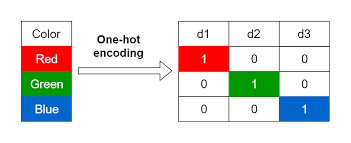

In [22]:
df = pd.read_csv('cars.csv')

In [23]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [24]:
df['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [25]:
df['brand'].nunique()

32

In [26]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [27]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

## 1. OneHotEncoding using Pandas

In [28]:
pd.get_dummies(df,columns=['fuel','owner'])

# it coverts in boolean so we have to covert it into binaries if we use pandas

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


## 2. K-1 OneHotEncoding

Droping the very first encoded column to resist multicollinearity

In [29]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


## 3. OneHotEncoding using Sklearn

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [31]:
X_train.head()

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [34]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])

In [35]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [36]:
X_train_new.shape

(6502, 7)

In [37]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

## 4. OneHotEncoding with Top Categories

In [38]:
counts = df['brand'].value_counts()

In [39]:
df['brand'].nunique()
threshold = 100

In [40]:
repl = counts[counts <= threshold].index

In [41]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
6526,False,False,False,False,False,False,False,False,False,False,True,False,False
2023,False,False,False,False,False,False,True,False,False,False,False,False,False
1892,False,False,False,False,False,False,True,False,False,False,False,False,False
716,False,False,False,True,False,False,False,False,False,False,False,False,False
1391,False,False,False,False,False,False,True,False,False,False,False,False,False


# Column Transformer

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [43]:
df = pd.read_csv('covid_toy.csv')

In [44]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [45]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

In [47]:
X_train

,age,gender,fever,cough,city
11,65,Female,98.0,Mild,Mumbai
80,14,Female,99.0,Mild,Mumbai
10,75,Female,NaN,Mild,Delhi
62,56,Female,104.0,Strong,Bangalore
76,80,Male,100.0,Mild,Bangalore
...,...,...,...,...,...
23,80,Female,98.0,Mild,Delhi
37,55,Male,100.0,Mild,Kolkata
87,47,Male,101.0,Strong,Bangalore
94,79,Male,NaN,Strong,Kolkata


## 1. Aam Zindagi

In [48]:
# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
                                 
X_train_fever.shape

(80, 1)

In [49]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [50]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse_output=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

(80, 4)

In [51]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [52]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

## Mentos Zindagi

In [53]:
from sklearn.compose import ColumnTransformer

In [54]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [55]:
transformer.fit_transform(X_train).shape

(80, 7)

In [56]:
transformer.transform(X_test).shape

(20, 7)